# 3. Polynomial Regression, Train/Test Splitting and Overfitting/Underfitting

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (25/11/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Sklearn (tested on v0.0.post1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Numpy
import numpy as np
# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Mock dataset generation

This will be different compared to notebooks 1 and 2, as we will generate prices $ y_i $ as a polynomial function  of the surface $ x_i $.

In this notebook, we will assume that the function f(x), giving the price of an appartment with surface $ x $, will be defined as

$$ f(x) = 100000 + 14373x + 3x^3. $$

In addition, we will add a random noise to the final pricing, with a $ +/- 5\% $ drift as before.

As a final note, we will normalize the surfaces, by dividing the surface with the value of *max_surf*. This will help with visualization later on.

In [2]:
# All helper functions
min_surf = 40
max_surf = 150
def surface(min_surf, max_surf):
    # Note, we changed the surface inputs to be normalized by the value of max_surf.
    return round(np.random.uniform(min_surf, max_surf), 2)
def price(surface):
    # Note: this will return the price in millions of SGD.
    surface = surface
    return round((100000 + 14373*surface + 3*surface**3)*(1 + np.random.uniform(-0.1, 0.1)))/1000000
def get_x_list(l):
    return [v[0] for v in l]
def get_y_list(l):
    return [v[1] for v in l]
def linreg(a, b, min_surf, max_surf, n_points = 50):
    return [(x, a*x + b) for x in np.linspace(min_surf, max_surf, n_points)]
def loss_mse(a, b, x, y):
    val =  sum([(y_i - (a*x_i + b))**2 for x_i, y_i in zip(x, y)])/len(x)
    return '{:.2e}'.format(val)

In [3]:
# Dataset generation (n_points points will be generated).
# We will use a seed for reproducibility.
np.random.seed(47)
n_points = 50
dataset = [(s := surface(min_surf, max_surf), price(s)) for _ in range(n_points)]
inputs = get_x_list(dataset)
outputs = get_y_list(dataset)
print(inputs)
print(outputs)

[52.48, 120.16, 117.84, 111.01, 117.66, 68.16, 50.86, 110.49, 60.4, 69.8, 144.99, 122.2, 134.25, 100.83, 96.39, 99.06, 41.17, 112.21, 121.94, 79.8, 100.16, 59.21, 55.42, 91.91, 56.01, 98.04, 57.56, 51.41, 82.49, 101.82, 112.81, 144.95, 136.82, 67.77, 88.92, 138.32, 125.19, 92.96, 88.72, 106.9, 147.58, 131.88, 93.71, 140.88, 84.07, 110.61, 101.99, 74.49, 134.29, 134.95]
[1.410127, 6.822933, 7.104424, 5.700492, 6.339377, 1.836417, 1.176775, 5.530756, 1.765112, 2.027269, 10.483121, 6.605363, 9.652386, 5.027105, 3.903094, 4.256575, 0.970249, 6.477733, 6.952647, 2.78611, 4.334219, 1.529923, 1.375981, 4.10188, 1.436245, 4.167264, 1.528488, 1.263489, 2.722924, 4.870342, 5.653643, 10.321434, 10.303547, 2.179319, 3.401575, 10.536756, 8.375706, 3.694461, 3.489707, 5.328075, 12.106101, 8.140523, 4.229152, 9.917793, 3.118824, 5.719273, 4.833384, 2.535023, 9.251736, 9.715487]


### Linear Regression

As in Notebook 2., using sklearn.

In [4]:
# Reshape inputs and outputs as a 2D np.array
sk_inputs = np.array(inputs).reshape(-1, 1)
sk_outputs = np.array(outputs)
# Creating a sklearn Linear Regressor.
# It uses the same analytical formula from earlier, i.e. W^* = (X^T X)^{-1} X^T Y.
reg = LinearRegression().fit(sk_inputs, sk_outputs)
# The coefficients for a* and b* are found using coeff_ and intercept_ respectively.
a_sk = reg.coef_[0]
b_sk = reg.intercept_
print("Value for a_star, found by sklearn: ", a_sk)
print("Value for b_star, found by sklearn: ", b_sk)

Value for a_star, found by sklearn:  0.1009348521832437
Value for b_star, found by sklearn:  -4.839302803239049


Finally, we provide a display, showing the optimal linear regression model, in magenta, below.

Unfortunately, the data does not look linear anymore (as we defined the price function as a third degree polynomial function), which is why the linear regression does not fit the data that well.

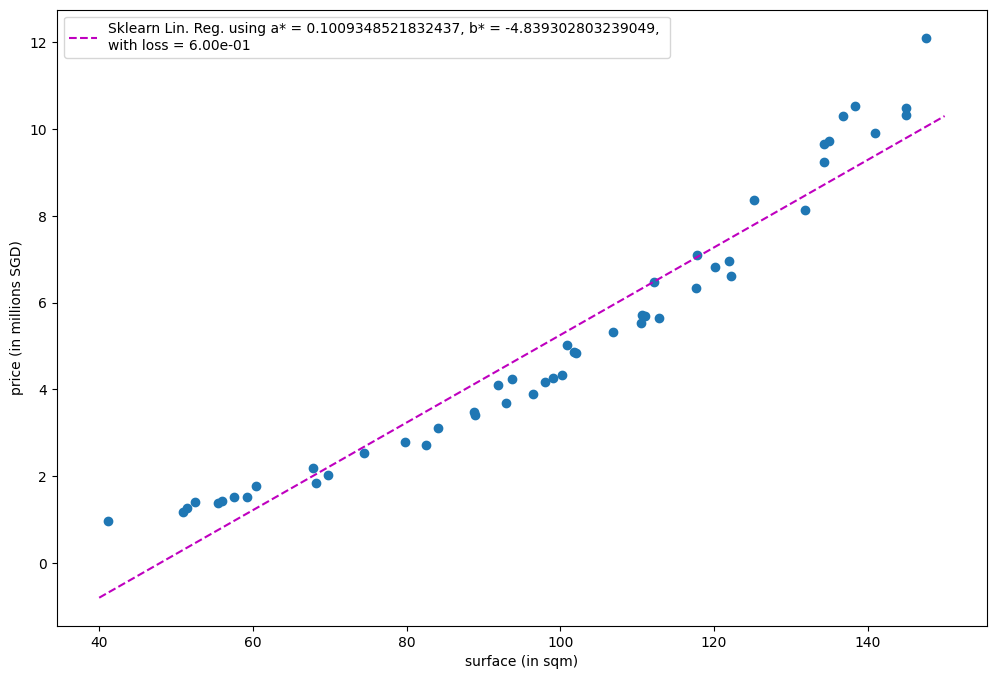

In [5]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Optimal linreg
linreg_dataset = linreg(a_sk, b_sk, min_surf, max_surf, n_points)
loss = loss_mse(a_sk, b_sk, inputs, outputs)
legend = "Sklearn Lin. Reg. using a* = {}, b* = {}, \nwith loss = {}".format(a_sk, b_sk, loss)
plt.plot(get_x_list(linreg_dataset), get_y_list(linreg_dataset), 'm--', label = legend)

# Display
plt.legend(loc = 'best')
plt.show()

### Polynomial Regression

Text

In [6]:
# Preparing polynomial features for our dataset
n_degree = 3
sk_poly = PolynomialFeatures(degree = n_degree, include_bias = False)
sk_poly_inputs = sk_poly.fit_transform(sk_inputs.reshape(-1, 1))
print(sk_poly_inputs)

[[5.24800000e+01 2.75415040e+03 1.44537813e+05]
 [1.20160000e+02 1.44384256e+04 1.73492122e+06]
 [1.17840000e+02 1.38862656e+04 1.63635754e+06]
 [1.11010000e+02 1.23232201e+04 1.36800066e+06]
 [1.17660000e+02 1.38438756e+04 1.62887040e+06]
 [6.81600000e+01 4.64578560e+03 3.16656746e+05]
 [5.08600000e+01 2.58673960e+03 1.31561576e+05]
 [1.10490000e+02 1.22080401e+04 1.34886635e+06]
 [6.04000000e+01 3.64816000e+03 2.20348864e+05]
 [6.98000000e+01 4.87204000e+03 3.40068392e+05]
 [1.44990000e+02 2.10221001e+04 3.04799429e+06]
 [1.22200000e+02 1.49328400e+04 1.82479305e+06]
 [1.34250000e+02 1.80230625e+04 2.41959614e+06]
 [1.00830000e+02 1.01666889e+04 1.02510724e+06]
 [9.63900000e+01 9.29103210e+03 8.95562584e+05]
 [9.90600000e+01 9.81288360e+03 9.72064249e+05]
 [4.11700000e+01 1.69496890e+03 6.97818696e+04]
 [1.12210000e+02 1.25910841e+04 1.41284555e+06]
 [1.21940000e+02 1.48693636e+04 1.81317020e+06]
 [7.98000000e+01 6.36804000e+03 5.08169592e+05]
 [1.00160000e+02 1.00320256e+04 1.004807

In [7]:
# Training a Polynomial Regressor
poly_reg_model = LinearRegression()
poly_reg_model.fit(sk_poly_inputs, sk_outputs)
a_sk = poly_reg_model.coef_
b_sk = poly_reg_model.intercept_
print(a_sk, b_sk)

[-2.51480899e-02  4.61448814e-04  1.26308847e-06] 1.1792597132722231


As before with the *linreg()* function, which we used to produce lists of values for displaying the model on matplotlib, we can come up with a *polyreg()* function. It basically does the same thing, but by using a polynomial function instead of a linear one. As explained in Notebook 2., we will rely on the *predict()* method, to be used on our trained model.

In [8]:
def polyreg(poly_reg_model, n_degree, min_surf, max_surf, n_points = 50):
    return [(x, poly_reg_model.predict(np.array([[x**(i+1) for i in range(n_degree)]]))) for x in np.linspace(min_surf, max_surf, n_points)]

In [9]:
def loss_mse_poly(poly_reg_model, n_degree, inputs, outputs):
    values = [(y, poly_reg_model.predict(np.array([[x**(i+1) for i in range(n_degree)]]))[0]) for x, y in zip(inputs, outputs)]
    losses = [(v[0] - v[1])**2 for v in values]
    val = sum(losses)/len(inputs)
    return '{:.2e}'.format(val)

Finally, we provide a display, showing the optimal linear regression model, in magenta, below.

Unfortunately, the data does not look linear anymore (as we defined the price function as a third degree polynomial function), which is why the linear regression does not fit the data that well.

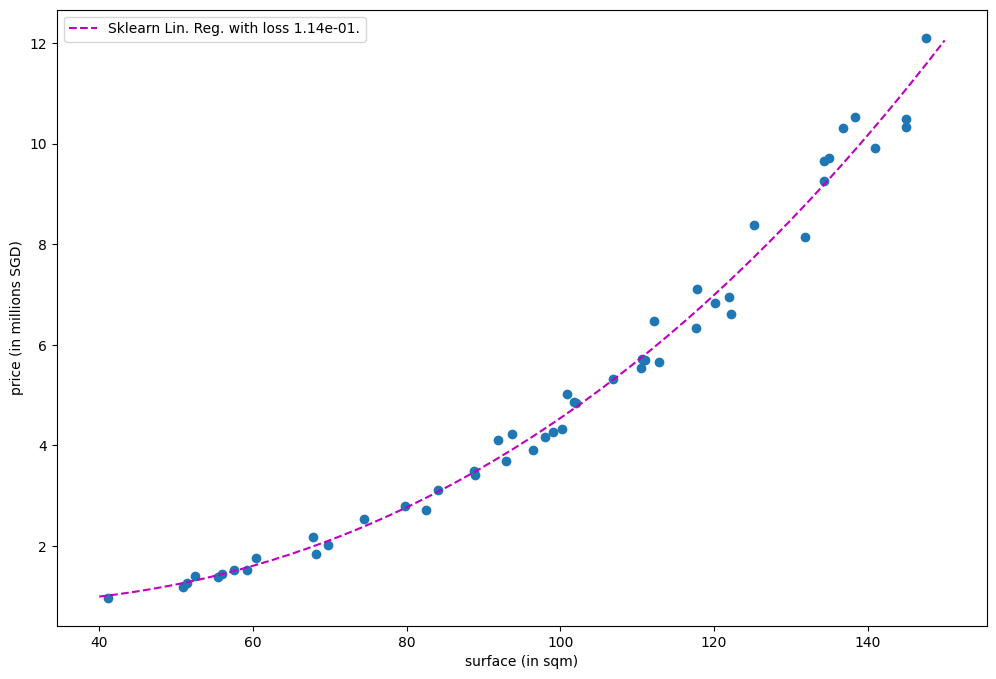

In [10]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Optimal linreg
polyreg_dataset = polyreg(poly_reg_model, n_degree, min_surf, max_surf, n_points)
loss1 = loss_mse_poly(poly_reg_model, n_degree, inputs, outputs)
legend = "Sklearn Lin. Reg. with loss {}.".format(loss1)
plt.plot(get_x_list(polyreg_dataset), get_y_list(polyreg_dataset), 'm--', label = legend)

# Display
plt.legend(loc = 'best')
plt.show()

### Polynomial Regression (higher degree)

Text

In [11]:
# Preparing polynomial features for our dataset
n_degree2 = 15
sk_poly2 = PolynomialFeatures(degree = n_degree2, include_bias = False)
sk_poly_inputs2 = sk_poly2.fit_transform(sk_inputs.reshape(-1, 1))
print(sk_poly_inputs2)

[[5.24800000e+01 2.75415040e+03 1.44537813e+05 7.58534443e+06
  3.98078875e+08 2.08911794e+10 1.09636909e+12 5.75374501e+13
  3.01956538e+15 1.58466791e+17 8.31633720e+18 4.36441376e+20
  2.29044434e+22 1.20202519e+24 6.30822820e+25]
 [1.20160000e+02 1.44384256e+04 1.73492122e+06 2.08468134e+08
  2.50495310e+10 3.00995164e+12 3.61675789e+14 4.34589628e+16
  5.22202897e+18 6.27479001e+20 7.53978768e+22 9.05980887e+24
  1.08862663e+27 1.30809376e+29 1.57180547e+31]
 [1.17840000e+02 1.38862656e+04 1.63635754e+06 1.92828372e+08
  2.27228954e+10 2.67766599e+12 3.15536161e+14 3.71827812e+16
  4.38161893e+18 5.16329975e+20 6.08443243e+22 7.16989517e+24
  8.44900447e+26 9.95630687e+28 1.17325120e+31]
 [1.11010000e+02 1.23232201e+04 1.36800066e+06 1.51861754e+08
  1.68581733e+10 1.87142581e+12 2.07746980e+14 2.30619922e+16
  2.56011176e+18 2.84198006e+20 3.15488206e+22 3.50223458e+24
  3.88783061e+26 4.31588076e+28 4.79105923e+30]
 [1.17660000e+02 1.38438756e+04 1.62887040e+06 1.91652892e+08
  

In [12]:
# Training a Polynomial Regressor
poly_reg_model2 = LinearRegression()
poly_reg_model2.fit(sk_poly_inputs2, sk_outputs)
a_sk2 = poly_reg_model2.coef_
b_sk2 = poly_reg_model2.intercept_
print(a_sk2, b_sk2)

[ 2.74318987e-38  1.86333985e-24  2.76957613e-27 -1.31729714e-32
  2.59498014e-30  1.94054783e-28  1.33369990e-26  8.23088286e-25
  4.35717140e-23  1.79827897e-21  4.46699529e-20 -1.31481768e-21
  1.45909461e-23 -7.22234478e-26  1.34349419e-28] 1.3852331319831421


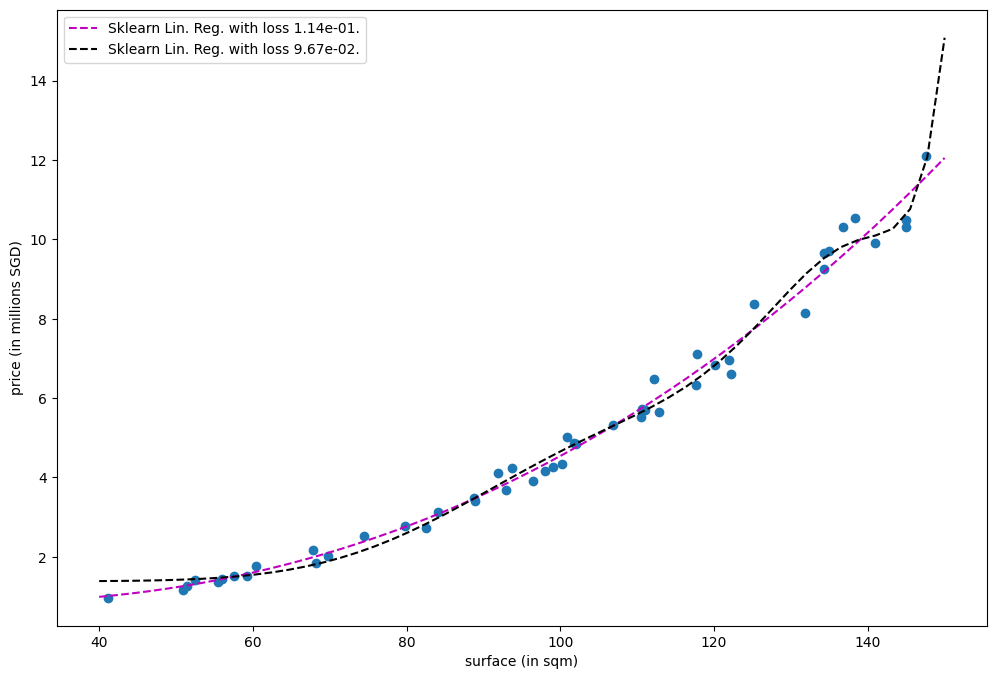

In [13]:
# Display dataset
plt.figure(figsize = (12, 8))
plt.scatter(inputs, outputs)
plt.xlabel("surface (in sqm)")
plt.ylabel("price (in millions SGD)")

# Optimal linreg
polyreg_dataset = polyreg(poly_reg_model, n_degree, min_surf, max_surf, n_points)
loss1 = loss_mse_poly(poly_reg_model, n_degree, inputs, outputs)
legend = "Sklearn Lin. Reg. with loss {}.".format(loss1)
plt.plot(get_x_list(polyreg_dataset), get_y_list(polyreg_dataset), 'm--', label = legend)

# Optimal linreg
polyreg_dataset2 = polyreg(poly_reg_model2, n_degree2, min_surf, max_surf, n_points)
loss2 = loss_mse_poly(poly_reg_model2, n_degree2, inputs, outputs)
legend = "Sklearn Lin. Reg. with loss {}.".format(loss2)
plt.plot(get_x_list(polyreg_dataset2), get_y_list(polyreg_dataset2), 'k--', label = legend)

# Display
plt.legend(loc='best')
plt.show()

In [14]:
def theoretical_values(surface, max_surf):
    avg_val = round((100000 + 14373*surface + 3*surface**3))/1000000
    min_val = 0.9*avg_val
    max_val = 1.1*avg_val
    return [min_val, avg_val, max_val]

In [15]:
new_appt_surface1 = 95
pred_price1 = poly_reg_model.predict(np.array([[(new_appt_surface1)**(i+1) for i in range(n_degree)]]))[0]
print(pred_price1, theoretical_values(new_appt_surface1, max_surf))
new_appt_surface2 = 150
pred_price2 = poly_reg_model.predict(np.array([[(new_appt_surface2)**(i+1) for i in range(n_degree)]]))[0]
print(pred_price2, theoretical_values(new_appt_surface2, max_surf))

4.037707205561033 [3.633804, 4.03756, 4.4413160000000005]
12.052568152460701 [11.142855, 12.38095, 13.619045000000002]


In [16]:
new_appt_surface1 = 95
pred_price1b = poly_reg_model2.predict(np.array([[(new_appt_surface1)**(i+1) for i in range(n_degree2)]]))[0]
print(pred_price1b, theoretical_values(new_appt_surface1, max_surf))
new_appt_surface2 = 150
pred_price2b = poly_reg_model2.predict(np.array([[(new_appt_surface2)**(i+1) for i in range(n_degree2)]]))[0]
print(pred_price2b, theoretical_values(new_appt_surface2, max_surf))

4.1425548394143945 [3.633804, 4.03756, 4.4413160000000005]
15.082170961559342 [11.142855, 12.38095, 13.619045000000002]
